IMPORTS, CONSTANTS, AND BASIC SETUP

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


alpha = 1.5
beta = 1.1
gamma = 2.5
delta = 1.4
kappa = 0.5

numX1Pts = 30
numX2Pts = 30 

x1Range = np.linspace(start=0, stop=5, num=numX1Pts)
x2Range = np.linspace(start=0, stop=5, num=numX2Pts)
tRange = np.linspace(start=0, stop=20, num=2000)

x1, x2 = np.meshgrid(x1Range, x2Range)



CREATING VECTOR FIELD

In [87]:
def dx1dt(x1, x2) -> float:
    return -alpha * x1 + beta * x1 * x2

def dx2dt(x1, x2) -> float: 
    return gamma * (1 - kappa * x2) * x2 - delta * x1 * x2

u = dx1dt(x1, x2)
v = dx2dt(x1, x2)




GETTING NULLCLINES AND EQUILIBRIUM POINTS

In [88]:
#v-nullcline 1: x1 = 0
v_nullcline_1 = [np.zeros(shape=(numX1Pts,)), x2Range]


#v-nullcline 2: x2 = alpha / beta
v_nullcline_2 = [x1Range, np.full((numX2Pts,), alpha/beta)]

#h-nullcline 1: x2=0
h_nullcline_1 = [x1Range, np.zeros(shape=numX2Pts)]

#h-nullcline 2: x2 = 1 / kappa - (delta * x1) / (gamma * kappa) 
x2_vals = []
for x1_v in x1Range:
    x2_vals.append(1 / kappa - (delta * x1_v) / (gamma * kappa))

h_nullcline_2 = [x1Range, x2_vals]

eq_points_x1 = [0, 0, ((alpha / beta) - (1 / kappa)) * -gamma * kappa / delta]
eq_points_x2 = [0, 1 / kappa, alpha / beta]





In [89]:

def dSdt(t : float, S : tuple):
    x1, x2 = S
    return [dx1dt(x1, x2), dx2dt(x1,x2)]

init_1 = (5, 1)
init_2 = (1, 5)

S_0 = odeint(dSdt, y0=init_1, t=tRange, tfirst = True)
x1_0 = S_0.T[0] 
x2_0 = S_0.T[1]

S_1 = odeint(dSdt, y0=init_2, t=tRange, tfirst=True)
x1_1 = S_1.T[0]
x2_1 = S_1.T[1]

PLOTTING GRAPHS

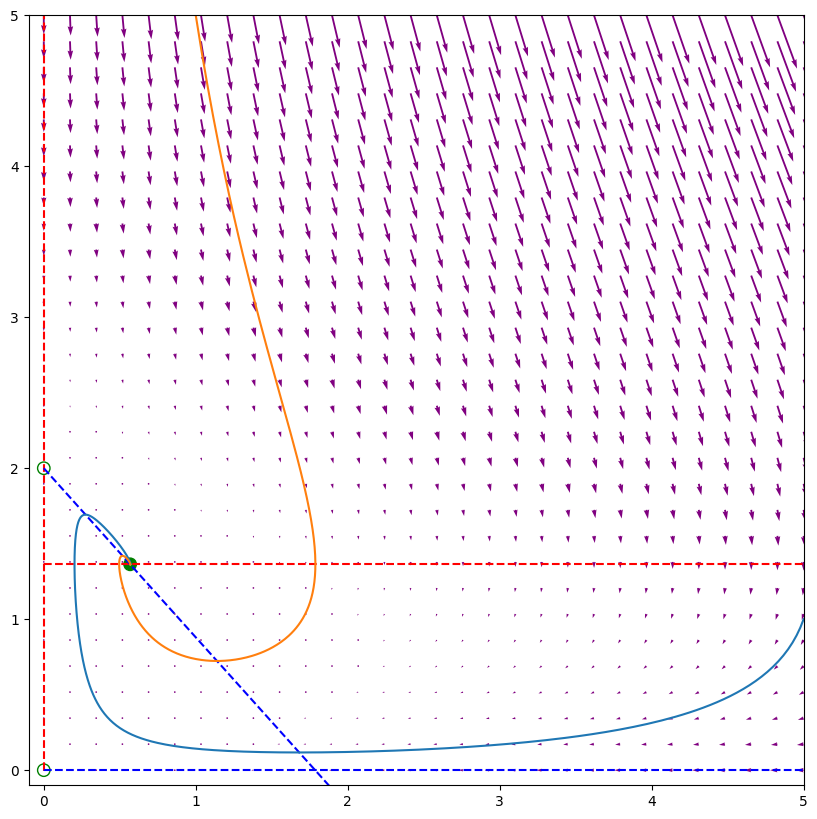

In [90]:
plt.figure(figsize=(10, 10))
plt.quiver(x1, x2, u, v, color = 'purple')

plt.scatter(x=eq_points_x1, y=eq_points_x2, s=80, facecolors=['none', 'none', 'green'], edgecolors='green')

plt.plot(v_nullcline_1[0], v_nullcline_1[1], color='r', linestyle='--')
plt.plot(v_nullcline_2[0], v_nullcline_2[1], color='r', linestyle='--')

plt.plot(h_nullcline_1[0], h_nullcline_1[1], color='b', linestyle='--')
plt.plot(h_nullcline_2[0], h_nullcline_2[1], color='b', linestyle='--')

plt.xlim((-0.1,5))
plt.ylim((-0.1,5))

plt.plot(x1_0, x2_0)
plt.plot(x1_1, x2_1)

plt.show()

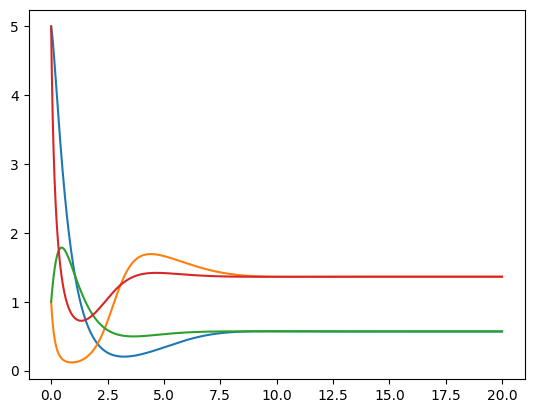

In [93]:
plt.plot(tRange, x1_0)
plt.plot(tRange, x2_0)
plt.plot(tRange, x1_1)
plt.plot(tRange, x2_1)